In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta

API keys can be found here: https://twelvedata.com/account/api-keys

In [14]:
# Set up parameters for the API request
symbol = "BTC/USD"
interval = "1h"  
end_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S")  # Last 7 days

params = {
    "symbol": symbol,
    "interval": interval,
    "apikey": API_KEY,
    "start_date": start_date,
    "end_date": end_date
}

response = requests.get(BASE_URL, params=params)

             datetime         open         high          low        close  \
4 2024-11-05 05:00:00  68277.50000  68750.00000  68248.94000  68697.66000   
3 2024-11-05 06:00:00  68697.15000  68763.04000  68528.77000  68733.42000   
2 2024-11-05 07:00:00  68732.46000  68939.39000  68535.47000  68854.99000   
1 2024-11-05 08:00:00  68857.49000  69009.83000  68737.82000  68988.61000   
0 2024-11-05 09:00:00  68988.44000  69059.32000  68787.72000  68790.22000   

      price  
4  68697.66  
3  68733.42  
2  68854.99  
1  68988.61  
0  68790.22  
Current price: $68790.22 at 2024-11-05 09:00:00


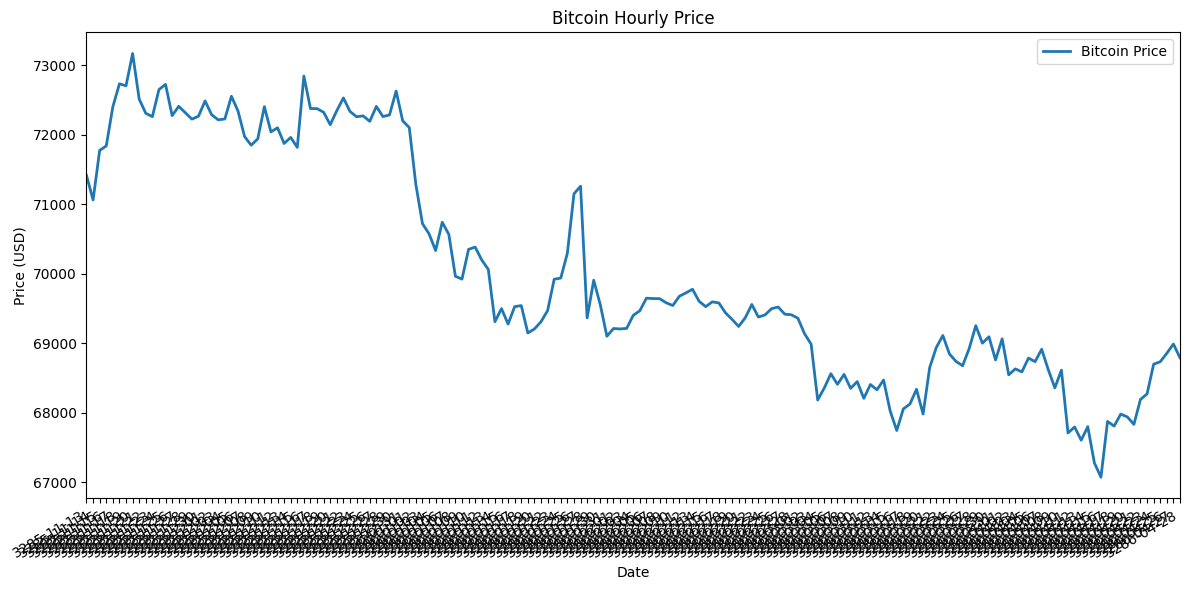

In [15]:
if response.status_code == 200:
    data = response.json()
    
    if "values" in data:
        # Convert the data to a pandas DataFrame
        df = pd.DataFrame(data["values"])
        
        # Convert datetime and numeric columns
        df["datetime"] = pd.to_datetime(df["datetime"])
        df["price"] = pd.to_numeric(df["close"])  # Using 'close' as the hourly price
        
        # Sort the DataFrame by date
        df = df.sort_values("datetime")
        
        print(df.tail())

        # Get current price (most recent price in the data)
        current_price = df["price"].iloc[-1]
        current_time = df["datetime"].iloc[-1]
        print(f"Current price: ${current_price:.2f} at {current_time}")

        # Plotting
        fig, ax = plt.subplots(figsize=(12, 6))

        df.plot(x='datetime', y='price', ax=ax, linewidth=2)

        plt.title('Bitcoin Hourly Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')

        # Set major locator to days
        ax.xaxis.set_major_locator(mdates.DayLocator())

        # Define a custom formatter function for displaying dates
        def date_formatter(x, pos):
            date = mdates.num2date(x)
            return date.strftime('%Y-%m-%d')

        ax.xaxis.set_major_formatter(FuncFormatter(date_formatter))
        plt.gcf().autofmt_xdate()

        plt.legend(['Bitcoin Price'])

        plt.tight_layout()
        plt.show()

    else:
        print("No data found in the response")
else:
    print(f"Error: {response.status_code}")
    print(response.text)